Ejemplo en clase
# Problema 1, Guía 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# requiere latex + itikz (https://github.com/jbn/itikz) + pdf2svg 
%load_ext itikz
plt.rc('figure', figsize=(20,20))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

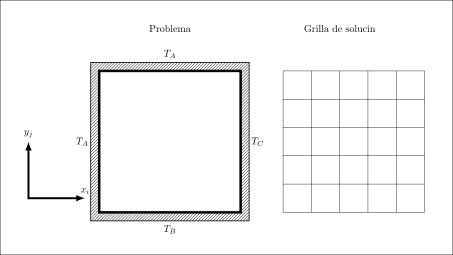

In [2]:
%%itikz
% requiere latex + itikz (https://github.com/jbn/itikz) + pdf2svg 
\documentclass[tikz]{standalone}
\usepackage{amsmath}
\usetikzlibrary{patterns,positioning}

\begin{document}

  \begin{tikzpicture}
    \draw [fill=white] (-6, -4) rectangle (10,5);
    \node at (0, 4) {Problema};
    \node at (6,4) {Grilla de solución};
     \draw [draw,thick,pattern=north east lines] (-2.8,-2.8) rectangle (2.8,2.8);
    \draw [draw,line width=2.5pt,anchor=base,fill=white] (-2.5,-2.5) rectangle (2.5,2.5);
    \draw [<->, >=latex, line width = 2pt ]
    (-5,0) node [anchor=south] { $y_j$ }  -- (-5,-2) -- (-3,-2) node [anchor=south] {$x_i$};
    \node at (-3.1,0) {$T_A$};
    \node at (0,-3.1) {$T_B$};
    \node at (3.1,0)  {$T_C$};
    \node at (0,3.1)  {$T_A$};
    
    \draw[step=1cm, yshift=0.5cm] (4, -3) grid (9, 2);
  \end{tikzpicture}

\end{document}


In [3]:
nx = 10
ny = 10

Tipo_Cond = [0,0,0,1]  #0 para temperatura, 1 para flujo de calor
Cond_contor = [75,100,50,0]
#  [izquierda, arriba, derecha, abajo]



n = nx * ny
beta = nx/ny 


Matriz = np.eye(n,n)
Vector_B = np.zeros(n)

In [4]:
Matriz

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [5]:

for i in range (1,nx-1):
    for j in range (1,ny-1):
        k = i + j * nx
        Matriz[k,k] = -2 * (beta**2 + 1) 
        Matriz[k,k+nx] = beta**2
        Matriz[k,k-nx] = beta**2
        Matriz[k,k-1] = 1
        Matriz[k,k+1] = 1


In [6]:
esquinas = np.zeros(4)
esquinas[0] = 0
esquinas[1] = nx-1
esquinas[2] = (ny-1)*nx
esquinas[3] = (nx-1) + (ny-1)*nx

## Visualizacion de la matriz:

In [7]:
import matplotlib

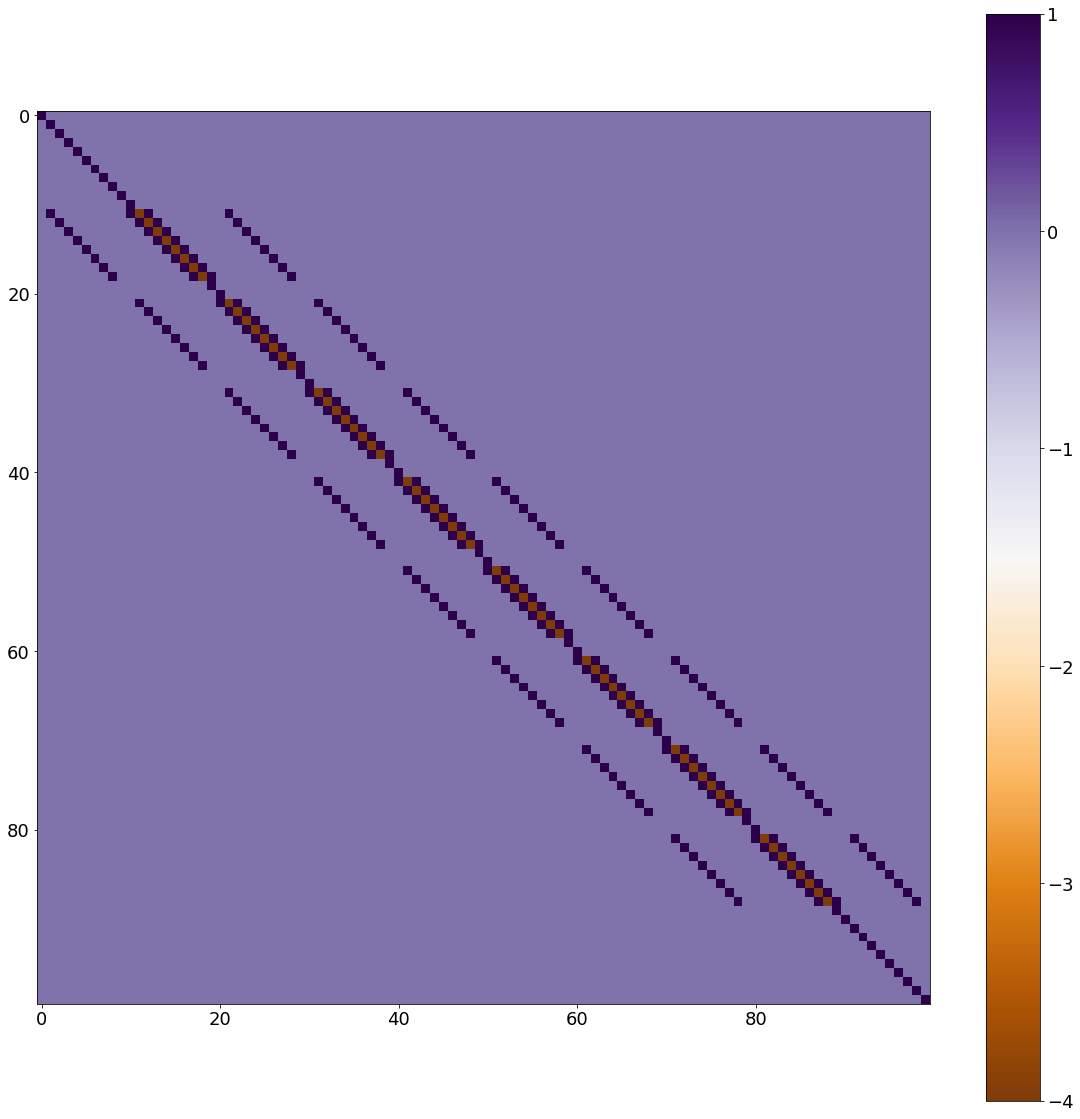

In [8]:
cmap = matplotlib.cm.get_cmap('PuOr')
MMAP = plt.imshow(Matriz, cmap=cmap)
cbar = plt.colorbar(MMAP)

In [9]:
Ta = Cond_contor [0] #izquierda
Tb = Cond_contor[1] #arriba
Tc = Cond_contor [2] #derecha
Td = Cond_contor [3] #abajo


T_prod1 = (Ta+Td)/2
T_prod2 = (Ta+Tb)/2
T_prod3 = (Tc+Tb)/2
T_prod4 = (Tc+Td)/2
T_prom = [T_prod1,T_prod2,T_prod3,T_prod4]

l = 0

for i in range (nx):
    for j in range (ny):
        k = i + j * nx
        if i == 0 and 0<j<ny-1:
            Vector_B[k] = Ta
        elif i == nx-1 and 0<j<ny-1:         
            Vector_B[k] = Tc
        elif 0<i<nx-1 and j == 0:
            Vector_B[k] = Td
        elif 0<i<nx-1 and j == ny-1:
            Vector_B[k] = Tb            
        
        if k in esquinas:
            Vector_B[k] = T_prom[l]
            l += 1
            
            
print(Vector_B)

[ 37.5   0.    0.    0.    0.    0.    0.    0.    0.   75.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   75.    0.    0.    0.    0.    0.
   0.    0.    0.   50.   75.    0.    0.    0.    0.    0.    0.    0.
   0.   50.   75.    0.    0.    0.    0.    0.    0.    0.    0.   50.
  75.    0.    0.    0.    0.    0.    0.    0.    0.   50.   75.    0.
   0.    0.    0.    0.    0.    0.    0.   50.   75.    0.    0.    0.
   0.    0.    0.    0.    0.   50.   87.5 100.  100.  100.  100.  100.
 100.  100.  100.   25. ]


In [10]:
T = np.linalg.solve(Matriz,Vector_B)
Matriz_Temp = np.zeros([nx,ny])

for i in range (0,nx):
    for j in range (0,ny):
        k = i + j * nx
        Matriz_Temp[j,i] = T[k]
        # es j, i porque:
        # j es nuestroíndice para la altura, que en la matriz está en las filas,
        # i es nuestro índice para la distancia horizontal, que en la matriz on las columnas

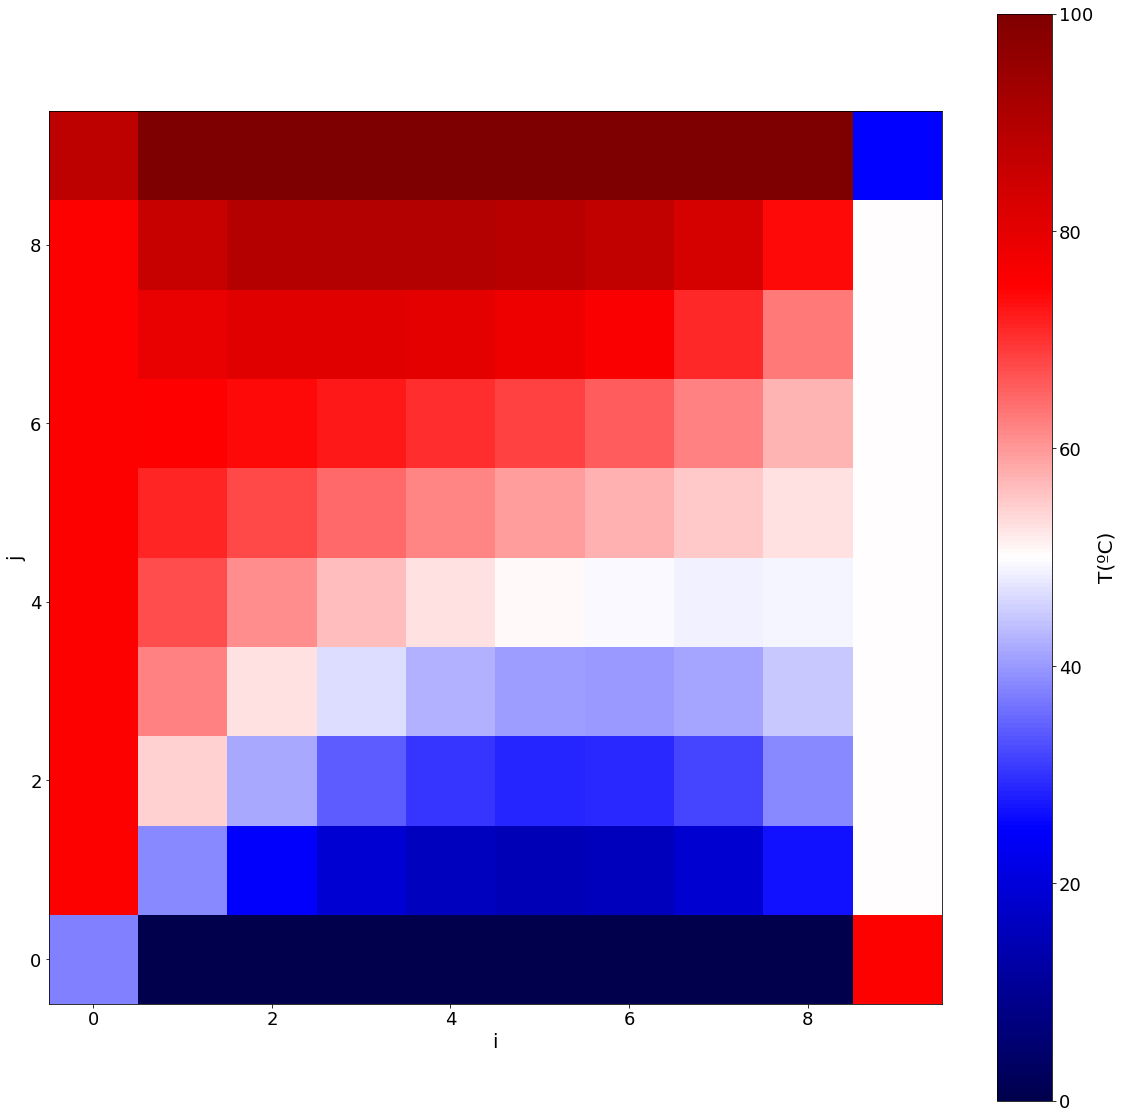

In [11]:
#print(Matriz_Temp)
plt.imshow(Matriz_Temp,origin='lower',cmap='seismic')
plt.xlabel('i')
plt.ylabel('j')
cbar = plt.colorbar()
cbar.set_label('T(ºC)')

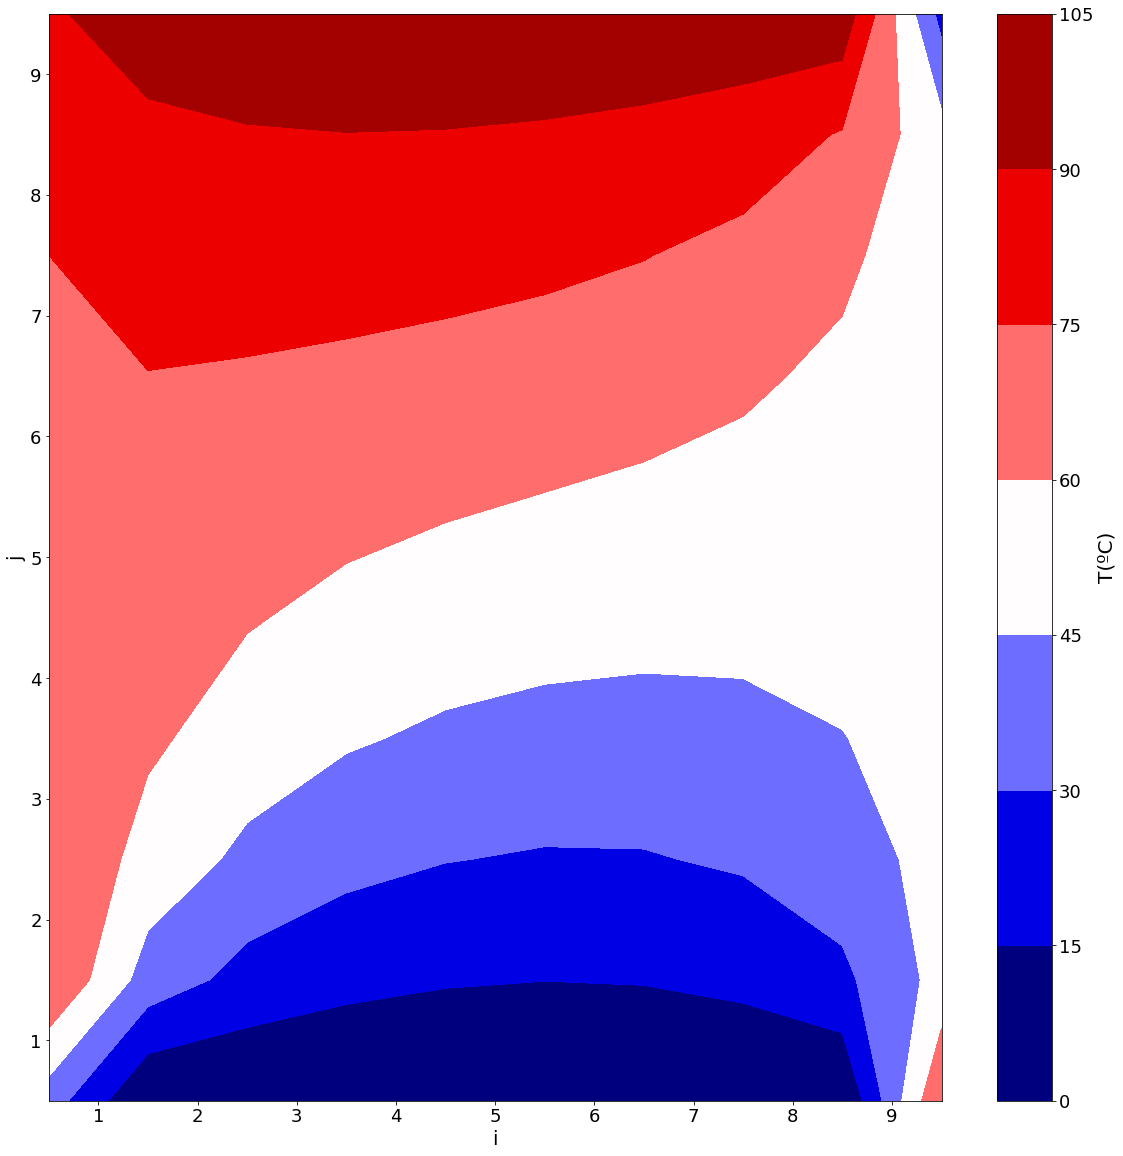

In [12]:
#print(Matriz_Temp)
themap = plt.contourf(Matriz_Temp,origin='lower', cmap='seismic')
plt.xlabel('i')
plt.ylabel('j')
cbar = plt.colorbar(themap)
cbar.set_label('T(ºC)')